In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# import numpy as np
# import pandas as pd
from tensorflow.keras.datasets import mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [4]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()

In [6]:
model.add(Conv2D(filters=70,kernel_size=3,activation='relu',input_shape=(28,28,1)))

In [7]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))

In [8]:
model.add(Flatten())

In [9]:
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='categorical_crossentropy')

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3269 - accuracy: 0.9556 - val_loss: 0.0836 - val_accuracy: 0.9771
Epoch 2/3
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0797 - accuracy: 0.9784 - val_loss: 0.0852 - val_accuracy: 0.9762
Epoch 3/3
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0729 - accuracy: 0.9798 - val_loss: 0.0815 - val_accuracy: 0.9787


In [14]:
model.save('number_predictor.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 70)        700       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        40384     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                368650    
Total params: 409,734
Trainable params: 409,734
Non-trainable params: 0
_________________________________________________________________


In [16]:
# converting tensorlfow model into tflite model
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_model = tf_lite_converter.convert()

In [17]:
tflite_model_name = 'number_predictor.tflite'
open(tflite_model_name,"wb").write(tf_lite_model)

1640956

In [23]:
# Interpreting our tflite model

interpreter = tf.lite.Interpreter(model_path='number_predictor.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_input_details()
print("input shape: ",input_details[0]['shape'])
print("Input type: ",input_details[0]['dtype'])
print("Output shape: ",output_details[0]['shape'])
print("output type: ",output_details[0]['dtype'])

input shape:  [ 1 28 28  1]
Input type:  <class 'numpy.float32'>
Output shape:  [ 1 28 28  1]
output type:  <class 'numpy.float32'>


In [ ]:
image = X_train[82]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [ ]:
image.shape

ValueError: None is only supported in the 1st dimension. Tensor 'input_tensor' has invalid shape '[1, None, None, 3]'.

In [27]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])


In [28]:
print(image.shape)
pred = model.predict([image])
print('Predicted number is {}'.format(np.argmax(pred)))

(1, 28, 28, 1)
Predicted number is 2


# Inception v3 

Predicted: [('n04146614', 'school_bus', 0.3618561), ('n03594945', 'jeep', 0.1298705), ('n03970156', 'plunger', 0.07115937)]


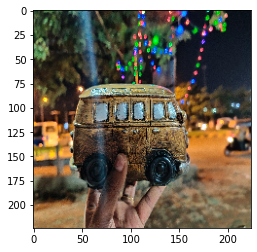

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt



model = ResNet50(weights='imagenet')

img_path = '/home/vignesh/Desktop/photos/IMG_20191103_193037.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [1]:
import numpy as np

In [14]:
a = np.array([[1,2],[1,5],[1,3]])

b = np.expand_dims(a,axis=0)

print(a)
print('----------')
print(b)

[[1 2]
 [1 5]
 [1 3]]
----------
[[[1 2]
  [1 5]
  [1 3]]]
